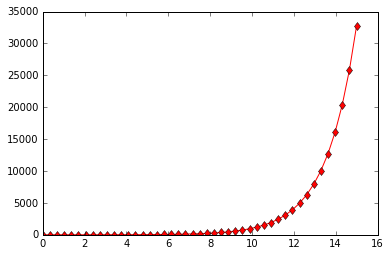

In [2]:
# HOW TO PLOT WITH MATPLOTLIB
%matplotlib inline
from numpy import linspace
from matplotlib import pyplot

x = linspace(0, 15, 45)
y = 2**x

pyplot.plot(x, y, 'rd-')


In [1]:
#profiles.out used original input file data
#profiles2.out held 4.3V for 1.5min
#profiles2_detailed.out gives much more data for the above simulation
#profiles3_long.out was set to run 3 min instead of 1.5; stopped at 1.7 due to comp. time

with open('basicDischarge_profiles.out', 'r') as fin:
    data_list = []
    data = []
    
    # ignore the first line
    for line in fin.readlines()[1:]:
        
        line = line.rstrip('\n').rstrip(' ')
        if line == '':
            if data != []:
                data_list.append(data)
                data = []
            continue
        #print(line)
        data.append(line)
        
    #print(data_list[0], '\n')
    #print(data_list[1])


In [4]:
# list of appropriate variable lists for each time chunk
distance_list = []
elec_conc_list = []
sol_surf_conc_list = []
liquid_potential_list = []
solid_potential_list = []
liquid_cur_list = []
j_main_list = []
j_side1_list = []
j_side2_list = []
j_side3_list = []
time_list = []


# extract numeric data from each chunk into appropriate lists
for data in data_list :
    # extract columns
    distance = []
    elec_conc = []
    sol_surf_conc = []
    liquid_potential = []
    solid_potential = []
    liquid_cur = []
    j_main = []
    j_side1 = []
    j_side2 = []
    j_side3 = []

    # add each row's data into appropriate list
    for row in data[3:]:
        tmp = row.split(',')
        distance.append(float(tmp[0]))
        elec_conc.append(float(tmp[1]))
        sol_surf_conc.append(float(tmp[2]))
        liquid_potential.append(float(tmp[3]))
        solid_potential.append(float(tmp[4]))
        liquid_cur.append(float(tmp[5]))
        j_main.append(float(tmp[6]))
        j_side1.append(float(tmp[7]))
        j_side2.append(float(tmp[8]))
        j_side3.append(float(tmp[9]))
        
    #add each data list to its corresponding vector
    distance_list.append(distance)
    elec_conc_list.append(elec_conc)
    sol_surf_conc_list.append(sol_surf_conc)
    liquid_potential_list.append(liquid_potential)
    solid_potential_list.append(solid_potential)
    liquid_cur_list.append(liquid_cur)
    j_main_list.append(j_main)
    j_side1_list.append(j_side1)
    j_side2_list.append(j_side2)
    j_side3_list.append(j_side3)

    # extract time step and add to time list
    tmp = data[2]
    time = float(tmp.lstrip('t = ').split(' ')[0]) 
    time_list.append(time)
    


81


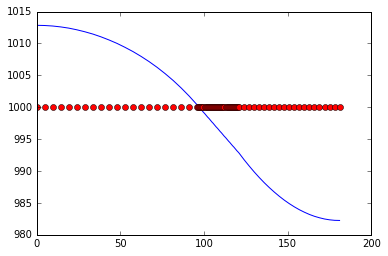

In [5]:
%matplotlib inline
from matplotlib import pyplot
pyplot.plot(distance, elec_conc)
pyplot.plot(distance, 1000*ones(len(distance)), 'ro')

print(len(distance_list[0]))

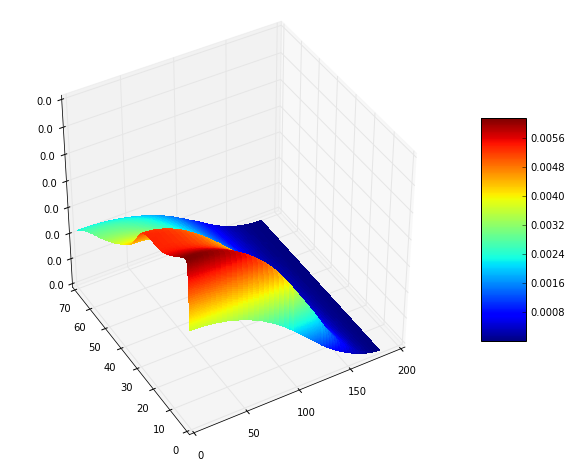

In [6]:
#surface of data from profiles.out
#surfaces are not appropriate for this usage; best when working with 
#one dependent variable calculated from two other variables

%matplotlib inline
from numpy import array, ones
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (10,8))
ax = fig.gca(projection='3d')

#must establish points for each timestep
x = array(distance_list[0])
t = time_list
x, t = np.meshgrid(x, t)
z = [];
for i in range(len(time_list)) :
        #x = array(distance_list[i])
        #t = time_list[i] * ones(len(x))
        z.append(liquid_potential_list[i])

z = array(z)
surf = ax.plot_surface(x, t, z, rstride=1, cstride=1, cmap = cm.jet, linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(8))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))
        
        
fig.colorbar(surf, shrink=0.5, aspect=5)   
#for angle in range(0, 360):
ax.view_init(40, 240)
#plt.draw()
#plt.show()


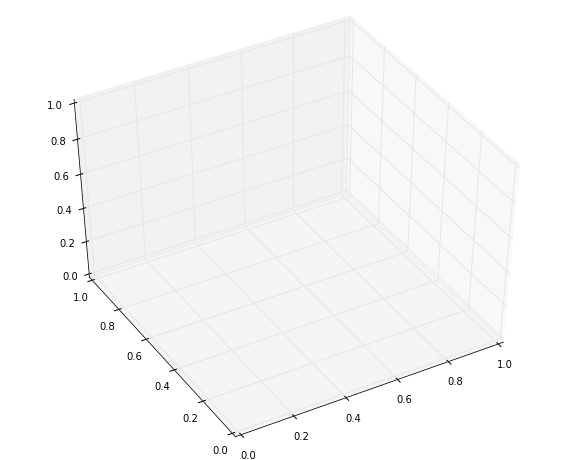

In [7]:
#Scatter using data from profiles.out

%matplotlib inline
from numpy import array, ones
from matplotlib import cm

fig = plt.figure(figsize=(10,8))
for i in range(len(time_list)): 
    if i >0:
        x = array(distance_list[i])
        t = time_list[i] * ones(len(x))
        phi_1 = array(elec_conc_list[i])
        ax = fig.gca(projection='3d')
        #ax.scatter3D(x, t, phi_1, c='c', marker = '^')       

ax.view_init(45, 240)


plt.show()

[1, 3, 5, 7, 9]
[2, 4, 6, 8, 10] 

[[1 3 5 7 9]
 [1 3 5 7 9]
 [1 3 5 7 9]
 [1 3 5 7 9]
 [1 3 5 7 9]]
[[ 2  2  2  2  2]
 [ 4  4  4  4  4]
 [ 6  6  6  6  6]
 [ 8  8  8  8  8]
 [10 10 10 10 10]]


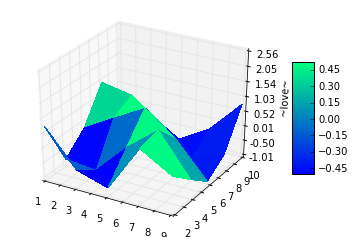

In [8]:
# experimentation with 3-D surfaces
# taken from example code on matplotlib

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d', zlabel = ' ~love~')
X = [1, 3, 5, 7, 9]
Y = [2, 4, 6, 8, 10]
print(X)
print(Y, '\n')
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

print(X)
print(Y)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.winter,
                       linewidth=0, antialiased=False)

ax.set_zlim(-1.01, 2.56)

ax.zaxis.set_major_locator(LinearLocator(8))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)


plt.show()

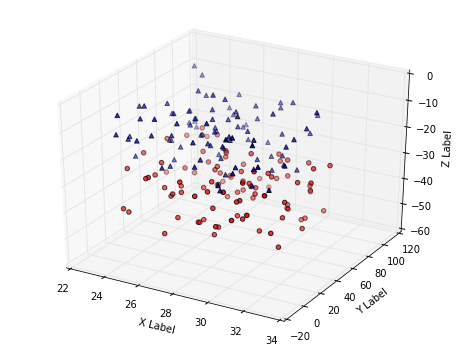

In [9]:
#experimentatin with 3-D scatter

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
n = 100
for c, m, zl, zh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zl, zh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()